# Claim Severity Model Regression

This is a project for identifying the claim severity model that best predicts the claims that have occured per the provided data. We utilzied claim amount as the variable of interest in this project. The work will be broken into five sections with the activity header, primary team member responsible for the activity listed, and a review of the processes and additional information based on what occured in that section below the header.  The 5 sections are:

### 1) Data Cleaning and Preparation

### 2) Merging

### 3) Visualization

### 4) Regression and Analysis

### 5) Conclusion

## 1) Data Cleaning and Preperation

We began the process by investigating each of the three data sets for their data categorization, values included or missing, column names, general column statistics, and total sample values per data set. With this data reviewed, we concluded a claim severity model would be the goal of the project. To ensure the claims data (primary data set) could be merged appropriately with the other data sets, I had to address missing values and correct the data types before merging could occur. I began with addressing all missing values with the ‘Booked (Seller)” data. The initial analysis resulted in 3 columns identified with missing values to address: “Amount of coverage_policy (thousands)”, “Policy_type”, and “Turnover_ratio_policy”. “Amount of coverage_policy (thousands)” was addressed by filtering the conditions of “Policy_type” and “Business_type_Seller” for the respective means for the various combinations.  This allowed the applied mean to be a statistically significant resolution versus a general mean.  For rows with missing “Policy_type,” the “Business_type_Seller” was the filter used as the difference between multiple or single policies had significant impacts to the remaining factors. Any missing values for “Policy_type” were changed to “unknown” at this stage. Lastly, the ‘Turnover_ratio_policy’ column was removed entirely per the class guidelines. Next, ‘Booked (Buyer)’ data was addressed to have zero missing values. This data set had “Sales_amount_buyer (million)”, “Policy_type”, and “Turnover_ratio_buyer” missing values from our analysis. The “Sales_amount_buyer (million)” and “Turnover_ratio_buyer” columns were addressed using “Policy_type” and “Business_type_buyer” to filter conditional means, which were then applied to the appropriate missing values.  Like  “Amount of coverage_policy (thousands)”, some “Policy_type” values were missing as well, so the “Business_type_buyer” filtered condition was applied in those conditions. The “Policy_type” was addressed through changing missing values to “unknown.” Lastly, the “Claims” data only had missing values in “Policy_type”, so they were addressed via an “unknown” designation as well

The next major step was addressing categorization of the columns to ensure proper application of the column data when regressed and maintaining consistency during merging. In the “Booked (Seller)” data, “Policy_type”, “Business_type_Seller” and “Industry_Seller” columns were identified as objects. All other columns were appropriately int32 or float64, requiring no further action on them. All the columns with object data were changed to category data since they would need to be hot encoded later in the process. This data set also had “Date of establishment (Seller)”, which I changed to the “Year_of_establishment” as we would later use this information in the form of their ages during regression. The data set “Brooked (Buyer)” had columns “Policy_type”, “Business_type_buyer” and “Industry_buyer” noted as objects with all other columns appropriately int32 or float64. The columns with objects were changed to category type.  Lastly “Claims” data only had “Policy_type” as an object, which was changed to category.
After any changes were made to a data set, verification was completed to ensure no further issues remained and the data was ready for the remaining process. During the project process, our additional follow up between each other was fruitful as continual verification.  An example was the “Turnover_ratio_buyer” column was accidently deleted on my “Booked (Buyer)” data set when I was manually reviewing the excel sheets earlier on.  This information was caught later in the process, and I was able to make my corrections, fill in the missing values in the column, and allow the team to continue their aspects of the project. It was also identified that “Seller_#” was accidently left when merging, showing a duplicate column when visualizing. I added “Seller_#” to the duplicated columns to be removed in merging as well to correct it.
One key item I want to note is during the presentation, feedback noted that the limited number of missing “Policy_type” values should be removed to have a better performing model.  This was because they were such a small percentage of the values that they would skew the model for a very limited and statistically small population. I added this removal step in the merging section since it could be more effectively completed when it was already one final combined data set. I took the merged data and removed all “unknown” values in the “Policy_type” column. 


In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#add all packages

In [270]:
#loading all project files
seller = pd.read_csv('Booked (Seller).csv',header= 2)
buyer = pd.read_csv('Booked (Buyer).csv',low_memory=False, header=2 )
claim = pd.read_excel('Claims.xlsx', header=2)

In [272]:
##Data CLeaning in preparation for merging## Completed by Chad Perkins

In [274]:
#calulating variables for missing values to fill in "Amount of coverage_policy (thousands)" column

#We are filtering for the combinations of "Policy_type" and "Business_type_Seller" to determine the mean that would be used to fill missing values in the column "Amount of coverage_policy (thousands)"
cond1 = (seller['Policy_type'] == 'One_buyer') & (seller['Business_type_Seller'] == 'Individual Business')
get_mean1 = seller.loc[cond1, 'Amount of coverage_policy (thousands)'].mean()
seller.loc[cond1, 'Amount of coverage_policy (thousands)'] = seller.loc[cond1, 'Amount of coverage_policy (thousands)'].fillna(get_mean1)

cond2 = (seller['Policy_type'] == 'One_buyer') & (seller['Business_type_Seller'] == 'Corporation')
get_mean2 = seller.loc[cond2, 'Amount of coverage_policy (thousands)'].mean()
seller.loc[cond2, 'Amount of coverage_policy (thousands)'] = seller.loc[cond2, 'Amount of coverage_policy (thousands)'].fillna(get_mean2)

cond3 = (seller['Policy_type'] == 'Multiple buyers') & (seller['Business_type_Seller'] == 'Individual Business')
get_mean3 = seller.loc[cond3, 'Amount of coverage_policy (thousands)'].mean()
seller.loc[cond3, 'Amount of coverage_policy (thousands)'] = seller.loc[cond3, 'Amount of coverage_policy (thousands)'].fillna(get_mean3)

cond4 = (seller['Policy_type'] == 'Multiple buyers') & (seller['Business_type_Seller'] == 'Corporation')
get_mean4 = seller.loc[cond4, 'Amount of coverage_policy (thousands)'].mean()
seller.loc[cond4, 'Amount of coverage_policy (thousands)'] = seller.loc[cond4, 'Amount of coverage_policy (thousands)'].fillna(get_mean4)

#Policy_type rows with missing values replaced with Business_type_Seller type mean to maintain rows without statistically changing the Business_type_Seller chracteristics
cond5 = (seller['Business_type_Seller'] == 'Individual Business')
get_mean5 = seller.loc[cond5, 'Amount of coverage_policy (thousands)'].mean()
seller.loc[(seller['Policy_type'].isna())&cond5, 'Amount of coverage_policy (thousands)'] = seller.loc[(seller['Policy_type'].isna())&cond5, 'Amount of coverage_policy (thousands)'].fillna(get_mean5)

cond6 = (seller['Business_type_Seller'] == 'Corporation')
get_mean6 = seller.loc[cond6, 'Amount of coverage_policy (thousands)'].mean()
seller.loc[(seller['Policy_type'].isna())&cond6, 'Amount of coverage_policy (thousands)'] = seller.loc[(seller['Policy_type'].isna())&cond6, 'Amount of coverage_policy (thousands)'].fillna(get_mean6)

#veryfing all values have been filled
print(f"Number of missing values: {seller['Amount of coverage_policy (thousands)'].isnull().sum()}")


Number of missing values: 0


In [276]:
#confirming only Policy_type is left with variables not filled so it can be catagorized after merging 
seller.isna().sum()

Policy #                                   0
Policy_type                              771
Policy year                                0
Seller Number                              0
Amount of coverage_policy (thousands)      0
Turnover_ratio_policy                    593
Business_type_Seller                       0
Industry_Seller                            0
Date of establishment (Seller)             0
dtype: int64

In [278]:
seller['Policy_type'] = seller['Policy_type'].replace('##', 'unknown').fillna('unknown')
seller['Policy_type'] = seller['Policy_type'].replace('###', 'unknown').fillna('unknown')

In [280]:
#calulating variables for missing values to fill in "Sales_amount_buyer (million)" column

#We are filtering for the combinations of "Policy_type" and "Business_type_Seller" to determine the mean that would be used to fill missing values in the column "Amount of coverage_policy (thousands)"
cond1 = (buyer['Policy_type'] == 'One_buyer') & (buyer['Business_type_buyer'] == 'Individual Business')
get_mean1 = buyer.loc[cond1, 'Sales_amount_buyer (million)'].mean()
buyer.loc[cond1, 'Sales_amount_buyer (million)'] = buyer.loc[cond1, 'Sales_amount_buyer (million)'].fillna(get_mean1)

cond2 = (buyer['Policy_type'] == 'One_buyer') & (buyer['Business_type_buyer'] == 'Corporation')
get_mean2 = buyer.loc[cond2, 'Sales_amount_buyer (million)'].mean()
buyer.loc[cond2, 'Sales_amount_buyer (million)'] = buyer.loc[cond2, 'Sales_amount_buyer (million)'].fillna(get_mean2)

cond3 = (buyer['Policy_type'] == 'Multiple buyers') & (buyer['Business_type_buyer'] == 'Individual Business')
get_mean3 = buyer.loc[cond3, 'Sales_amount_buyer (million)'].mean()
buyer.loc[cond3, 'Sales_amount_buyer (million)'] = buyer.loc[cond3, 'Sales_amount_buyer (million)'].fillna(get_mean3)

cond4 = (buyer['Policy_type'] == 'Multiple buyers') & (buyer['Business_type_buyer'] == 'Corporation')
get_mean4 = buyer.loc[cond4, 'Sales_amount_buyer (million)'].mean()
buyer.loc[cond4, 'Sales_amount_buyer (million)'] = buyer.loc[cond4, 'Sales_amount_buyer (million)'].fillna(get_mean4)

#Policy_type rows with missing values replaced with Business_type_buyer type mean to maintain rows without statstically changing the Business_type_buyer chracteristics
cond5 = (buyer['Business_type_buyer'] == 'Individual Business')
get_mean5 = buyer.loc[cond5, 'Sales_amount_buyer (million)'].mean()
buyer.loc[(buyer['Policy_type'].isna())&cond5, 'Sales_amount_buyer (million)'] = buyer.loc[(buyer['Policy_type'].isna())&cond5, 'Sales_amount_buyer (million)'].fillna(get_mean5)

cond6 = (buyer['Business_type_buyer'] == 'Corporation')
get_mean6 = buyer.loc[cond6, 'Sales_amount_buyer (million)'].mean()
buyer.loc[(buyer['Policy_type'].isna())&cond6, 'Sales_amount_buyer (million)'] = buyer.loc[(buyer['Policy_type'].isna())&cond6, 'Sales_amount_buyer (million)'].fillna(get_mean6)

#veryfing all values have been filled
print(f"Number of missing values: {buyer['Sales_amount_buyer (million)'].isnull().sum()}")

Number of missing values: 0


In [282]:
buyer['Sales_amount_buyer (thousand)']=buyer['Sales_amount_buyer (million)']*1000

In [284]:
#calulating variables for missing values to fill in "Turnover_ratio_buyer" column

#We are filtering for the combinations of "Policy_type" and "Business_type_Seller" to determine the mean that would be used to fill missing values in the column
cond1 = (buyer['Policy_type'] == 'One_buyer') & (buyer['Business_type_buyer'] == 'Individual Business')
get_mean1 = buyer.loc[cond1, 'Turnover_ratio_buyer'].mean()
buyer.loc[cond1, 'Turnover_ratio_buyer'] = buyer.loc[cond1, 'Turnover_ratio_buyer'].fillna(get_mean1)

cond2 = (buyer['Policy_type'] == 'One_buyer') & (buyer['Business_type_buyer'] == 'Corporation')
get_mean2 = buyer.loc[cond2, 'Turnover_ratio_buyer'].mean()
buyer.loc[cond2, 'Turnover_ratio_buyer'] = buyer.loc[cond2, 'Turnover_ratio_buyer'].fillna(get_mean2)

cond3 = (buyer['Policy_type'] == 'Multiple buyers') & (buyer['Business_type_buyer'] == 'Individual Business')
get_mean3 = buyer.loc[cond3, 'Turnover_ratio_buyer'].mean()
buyer.loc[cond3, 'Turnover_ratio_buyer'] = buyer.loc[cond3, 'Turnover_ratio_buyer'].fillna(get_mean3)

cond4 = (buyer['Policy_type'] == 'Multiple buyers') & (buyer['Business_type_buyer'] == 'Corporation')
get_mean4 = buyer.loc[cond4, 'Turnover_ratio_buyer'].mean()
buyer.loc[cond4, 'Turnover_ratio_buyer'] = buyer.loc[cond4, 'Turnover_ratio_buyer'].fillna(get_mean4)

#Policy_type rows with missing values replaced with Business_type_buyer type mean to maintain rows without statstically changing the Business_type_buyer chracteristics
cond5 = (buyer['Business_type_buyer'] == 'Individual Business')
get_mean5 = buyer.loc[cond5, 'Turnover_ratio_buyer'].mean()
buyer.loc[(buyer['Policy_type'].isna())&cond5, 'Turnover_ratio_buyer'] = buyer.loc[(buyer['Policy_type'].isna())&cond5, 'Turnover_ratio_buyer'].fillna(get_mean5)

cond6 = (buyer['Business_type_buyer'] == 'Corporation')
get_mean6 = buyer.loc[cond6, 'Turnover_ratio_buyer'].mean()
buyer.loc[(buyer['Policy_type'].isna())&cond6, 'Turnover_ratio_buyer'] = buyer.loc[(buyer['Policy_type'].isna())&cond6, 'Turnover_ratio_buyer'].fillna(get_mean6)

#veryfing all values have been filled
print(f"Number of missing values: {buyer['Turnover_ratio_buyer'].isnull().sum()}")

Number of missing values: 1


In [286]:
#checking the remaining row to address
buyer.loc[buyer['Turnover_ratio_buyer'].isnull()]

,Policy #,Policy_type,Policy year,Buyer number,Amount of coverage_buyer (thousand),Turnover_ratio_buyer,Business_type_buyer,Industry_buyer,Sales_amount_buyer (million),Sales_amount_buyer (thousand)
8314,28166,###,2016,1451400,320000.0,NaN,Corporation,Manufacturing,61531.0,61531000.0


In [288]:
#filling the last policy type row missing a value
buyer['Turnover_ratio_buyer'] = buyer['Turnover_ratio_buyer'].replace('NaN', 'get_mean6').fillna(get_mean6)

In [290]:
#dropping sales amount buyer
buyer = buyer.drop('Sales_amount_buyer (million)', axis=1)

In [292]:
#filling all missing polciy_types for claim and buyer data
buyer['Policy_type'] = buyer['Policy_type'].replace('##', 'unknown').fillna('unknown')
buyer['Policy_type'] = buyer['Policy_type'].replace('###', 'unknown').fillna('unknown')
claim['Policy_type'] = claim['Policy_type'].replace('##', 'unknown').fillna('unknown')
claim['Policy_type'] = claim['Policy_type'].replace('###', 'unknown').fillna('unknown')

In [294]:
#checking all missing values addressed
buyer.isna().sum()

Policy #                               0
Policy_type                            0
Policy year                            0
Buyer number                           0
Amount of coverage_buyer (thousand)    0
Turnover_ratio_buyer                   0
Business_type_buyer                    0
Industry_buyer                         0
Sales_amount_buyer (thousand)          0
dtype: int64

In [296]:
# Convert 'Date of establishment (Seller)' to datetime and extract year for a new column for 'Year_of_establishment'
seller['Date_of_establishment_str'] = seller['Date of establishment (Seller)'].astype(str)
seller['Year_of_establishment'] = seller['Date_of_establishment_str'].str[:4].astype(int)

In [298]:
#checking for data types for columns in data frame seller
print(seller.dtypes)

Policy #                                   int64
Policy_type                               object
Policy year                                int64
Seller Number                              int64
Amount of coverage_policy (thousands)    float64
Turnover_ratio_policy                    float64
Business_type_Seller                      object
Industry_Seller                           object
Date of establishment (Seller)            object
Date_of_establishment_str                 object
Year_of_establishment                      int32
dtype: object


In [300]:
#changing all column data types for seller data frame out of object for better use during analysis
seller['Policy_type']= seller['Policy_type'].astype('category')
seller['Business_type_Seller']= seller['Business_type_Seller'].astype('category')
seller['Industry_Seller']= seller['Industry_Seller'].astype('category')

In [302]:
#confirming all data types were changed and no longer objects
print(seller.dtypes)

Policy #                                    int64
Policy_type                              category
Policy year                                 int64
Seller Number                               int64
Amount of coverage_policy (thousands)     float64
Turnover_ratio_policy                     float64
Business_type_Seller                     category
Industry_Seller                          category
Date of establishment (Seller)             object
Date_of_establishment_str                  object
Year_of_establishment                       int32
dtype: object


In [304]:
#dropping Turnover_ratio_policy per instructions and removing columns used to convert Date of establishment (Seller) to Year_of_establishment
seller = seller.drop('Turnover_ratio_policy', axis=1)
seller = seller.drop('Date_of_establishment_str', axis=1)
seller = seller.drop('Date of establishment (Seller)', axis=1)

In [306]:
#confirming columns were dropped
print(seller.dtypes)

Policy #                                    int64
Policy_type                              category
Policy year                                 int64
Seller Number                               int64
Amount of coverage_policy (thousands)     float64
Business_type_Seller                     category
Industry_Seller                          category
Year_of_establishment                       int32
dtype: object


In [308]:
#checking for data types for columns for data frame buyer
print(buyer.dtypes)

Policy #                                 int64
Policy_type                             object
Policy year                              int64
Buyer number                             int64
Amount of coverage_buyer (thousand)    float64
Turnover_ratio_buyer                   float64
Business_type_buyer                     object
Industry_buyer                          object
Sales_amount_buyer (thousand)          float64
dtype: object


In [310]:
#changing all column data types for buyer data frame out of object for better use during analysis
buyer['Policy_type']= buyer['Policy_type'].astype('category')
buyer['Business_type_buyer']= buyer['Business_type_buyer'].astype('category')
buyer['Industry_buyer']= buyer['Industry_buyer'].astype('category')
buyer['Turnover_ratio_buyer']= buyer['Turnover_ratio_buyer'].astype('float64')

In [312]:
#confirming all data types were changed and no longer objects
print(buyer.dtypes)

Policy #                                  int64
Policy_type                            category
Policy year                               int64
Buyer number                              int64
Amount of coverage_buyer (thousand)     float64
Turnover_ratio_buyer                    float64
Business_type_buyer                    category
Industry_buyer                         category
Sales_amount_buyer (thousand)           float64
dtype: object


In [314]:
#checking for data types for columns for data frame claim
print(claim.dtypes)

Policy #                     int64
Policy_type                 object
Policy year                  int64
Seller #                     int64
Buyer #                      int64
Claim_amount (thousand)    float64
dtype: object


In [316]:
#changing all column data types for claim data frame out of object for better use during analysis
claim['Policy_type']= claim['Policy_type'].astype('category')

In [318]:
#confirming all data types were changed and no longer objects
print(claim.dtypes)

Policy #                      int64
Policy_type                category
Policy year                   int64
Seller #                      int64
Buyer #                       int64
Claim_amount (thousand)     float64
dtype: object


In [320]:
#confirming claim has no missing values
claim.isna().sum()

Policy #                   0
Policy_type                0
Policy year                0
Seller #                   0
Buyer #                    0
Claim_amount (thousand)    0
dtype: int64

In [322]:
#confirming number of claims is 1885
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Policy #                 1885 non-null   int64   
 1   Policy_type              1885 non-null   category
 2   Policy year              1885 non-null   int64   
 3   Seller #                 1885 non-null   int64   
 4   Buyer #                  1885 non-null   int64   
 5   Claim_amount (thousand)  1885 non-null   float64 
dtypes: category(1), float64(1), int64(4)
memory usage: 75.7 KB


## 2) Merging data for analysis

## Objective  
The goal was to merge the three datasets (buyer, seller, claims) into one dataset for visualization and analysis.

## Process  
1. All three datasets shared a common column, **Policy #**, **Policy Type**, and **Policy Year**
2. First, column names, Buyer Number and Seller Number were renamed across datasets.
3. The merging process involved the following steps:  
   - **Step 1**: A **left merge** was performed between the Claims dataset and the Buyer dataset using the shared columns, and their unique overlapping column, **Buyer #**. This step made sure the correct buyer numbers and policy types were assigned under each policy.  
   - **Step 2**: The resulting dataset was then merged with the Seller dataset using the same approach.  
4. Duplicate rows were removed if they had identical values for **Policy #**, **Claim Amount**, **Seller #**, and **Buyer #**.  
5. The dataset was inspected to confirm that:  
   - All features had consistent numbers of observations.  
   - There were no missing values in the columns.

## Outcome  
The final merged dataset contained only observations with claims, filtering out policies without claims from both the Buyer and Seller sides. The claims severity dataset is now clean, consistent, and ready for visualization and regression analysis.


In [326]:
#checking dimensions of individual datasets
print(buyer.shape)
print(seller.shape)
print(claim.shape)

(79888, 9)
(43170, 8)
(1885, 6)


In [328]:
#changing buyer number, seller number column names to match that of the claims dataset
buyer.rename(columns={'Buyer number': 'Buyer #'}, inplace=True)
seller.rename(columns={'Seller Number': 'Seller #'}, inplace=True)

In [330]:
#doing a left-merge of claims dataset with buyer first on common columns to ensure 
merge1 = pd.merge(claim, buyer, on=['Policy #', 'Policy_type', 'Buyer #','Policy year'], how='left')

#checking dimension of merge1
print(merge1.shape)

(1885, 11)


In [332]:
#merging newly merged dataset with seller next on common Policy ID column
mergeFinal = pd.merge(merge1, seller, on=['Policy #', 'Policy_type', 'Policy year','Seller #'], how='left')

#checking dimension of mergeFinal
print(mergeFinal.shape)

(6244, 15)


In [334]:
#dropping duplicate rows created by the merge
mergeFinal = mergeFinal.drop_duplicates(subset=['Policy #', 'Claim_amount (thousand)', 'Seller #','Buyer #'])

In [336]:
#printing sample of merged dataset
mergeFinal.head()

,Policy #,Policy_type,Policy year,Seller #,Buyer #,Claim_amount (thousand),Amount of coverage_buyer (thousand),Turnover_ratio_buyer,Business_type_buyer,Industry_buyer,Sales_amount_buyer (thousand),Amount of coverage_policy (thousands),Business_type_Seller,Industry_Seller,Year_of_establishment
0,21,Multiple buyers,2015,101800,2265700,29854.590,30000.0,2.02,Individual Business,Wholesale Trade,6234000.0,347000.0,Individual Business,Manufacturing,1983
3,64,Multiple buyers,2015,105700,2285600,15000.000,15000.0,5.30,Individual Business,Wholesale Trade,4797000.0,569000.0,Corporation,Transportation,1981
5,73,One_buyer,2015,106300,2288500,763.361,4000.0,8.16,Corporation,Manufacturing,49375000.0,4000.0,Individual Business,Manufacturing,1994
6,78,Multiple buyers,2015,106800,2289900,221610.224,400000.0,4.05,Corporation,Manufacturing,5759000.0,656000.0,Individual Business,Manufacturing,1981
8,99,Multiple buyers,2015,108000,920600,2838.563,5000.0,4.56,Corporation,Manufacturing,8016000.0,266000.0,Corporation,Manufacturing,1986


In [338]:
#inspecting row number for each variable and whether there are any null rows
mergeFinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1885 entries, 0 to 6243
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Policy #                               1885 non-null   int64   
 1   Policy_type                            1885 non-null   category
 2   Policy year                            1885 non-null   int64   
 3   Seller #                               1885 non-null   int64   
 4   Buyer #                                1885 non-null   int64   
 5   Claim_amount (thousand)                1885 non-null   float64 
 6   Amount of coverage_buyer (thousand)    1885 non-null   float64 
 7   Turnover_ratio_buyer                   1885 non-null   float64 
 8   Business_type_buyer                    1885 non-null   category
 9   Industry_buyer                         1885 non-null   category
 10  Sales_amount_buyer (thousand)          1885 non-null   float64 
 

In [340]:
#checking how many unknown policy_types exist after merging
mergeFinal[mergeFinal['Policy_type'] == 'unknown'].count()

Policy #                                 49
Policy_type                              49
Policy year                              49
Seller #                                 49
Buyer #                                  49
Claim_amount (thousand)                  49
Amount of coverage_buyer (thousand)      49
Turnover_ratio_buyer                     49
Business_type_buyer                      49
Industry_buyer                           49
Sales_amount_buyer (thousand)            49
Amount of coverage_policy (thousands)    49
Business_type_Seller                     49
Industry_Seller                          49
Year_of_establishment                    49
dtype: int64

In [342]:
#removing all unknown policy types per presentation feedback
mergeFinal = mergeFinal[mergeFinal['Policy_type'] != 'unknown']

In [344]:
#checking dimension of mergeFinal
#inital claims has 1885 rows - 49 rows that were unknown policy_type for a total of 1836 for known values
mergeFinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1836 entries, 0 to 6243
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Policy #                               1836 non-null   int64   
 1   Policy_type                            1836 non-null   category
 2   Policy year                            1836 non-null   int64   
 3   Seller #                               1836 non-null   int64   
 4   Buyer #                                1836 non-null   int64   
 5   Claim_amount (thousand)                1836 non-null   float64 
 6   Amount of coverage_buyer (thousand)    1836 non-null   float64 
 7   Turnover_ratio_buyer                   1836 non-null   float64 
 8   Business_type_buyer                    1836 non-null   category
 9   Industry_buyer                         1836 non-null   category
 10  Sales_amount_buyer (thousand)          1836 non-null   float64 
 

In [346]:
#Categorization:

In [348]:
#Category - Business Type of Seller
mergeFinal.Business_type_Seller.value_counts().reset_index()

,Business_type_Seller,count
0,Corporation,1475
1,Individual Business,361


In [350]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

mF_BtS_cat = mergeFinal[['Business_type_Seller']]

cat_encoder = OneHotEncoder() # transformer
BtS_cat_hot = cat_encoder.fit_transform(mF_BtS_cat)
BtS_cat_hot

<1836x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1836 stored elements in Compressed Sparse Row format>

In [352]:
BtS_cat_hot.toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [354]:
cat_encoder.categories_

[array(['Corporation', 'Individual Business'], dtype=object)]

In [356]:
#Category - Industry of Seller
mergeFinal.Industry_Seller.value_counts().reset_index()

,Industry_Seller,count
0,Wholesale Trade,919
1,Manufacturing,846
2,Transportation,33
3,Other Services,23
4,"Professional, Scientific, and Technical Services",14
5,Agriculture,1
6,Construction,0
7,Utilities,0


In [358]:
mF_IS_cat = mergeFinal[['Industry_Seller']]

cat_encoder = OneHotEncoder() # transformer
IS_cat_hot = cat_encoder.fit_transform(mF_IS_cat)
IS_cat_hot

<1836x6 sparse matrix of type '<class 'numpy.float64'>'
	with 1836 stored elements in Compressed Sparse Row format>

In [360]:
IS_cat_hot.toarray()

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [362]:
cat_encoder.categories_

[array(['Agriculture', 'Manufacturing', 'Other Services',
        'Professional, Scientific, and Technical Services',
        'Transportation', 'Wholesale Trade'], dtype=object)]

In [364]:
#Category - Year_of_establishment

mergeFinal.Year_of_establishment.value_counts().reset_index()


,Year_of_establishment,count
0,2012,127
1,2008,117
2,2011,117
3,2013,109
4,1999,95
5,2006,84
6,2014,83
7,2002,83
8,2007,83
9,2010,81


In [366]:
mF_YoE_cat = mergeFinal[['Year_of_establishment']]

cat_encoder = OneHotEncoder() # transformer
YoE_cat_hot = cat_encoder.fit_transform(mF_YoE_cat)
YoE_cat_hot

<1836x44 sparse matrix of type '<class 'numpy.float64'>'
	with 1836 stored elements in Compressed Sparse Row format>

In [368]:
YoE_cat_hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [370]:
cat_encoder.categories_

[array([1958, 1964, 1973, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
        1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
        1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
        2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])]

In [372]:
#Category - Policy_type
mergeFinal.Policy_type.value_counts().reset_index()


,Policy_type,count
0,Multiple buyers,1299
1,One_buyer,537
2,unknown,0


In [374]:
mF_Pt_cat = mergeFinal[['Policy_type']]

cat_encoder = OneHotEncoder() # transformer
Pt_cat_hot = cat_encoder.fit_transform(mF_Pt_cat)
Pt_cat_hot

<1836x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1836 stored elements in Compressed Sparse Row format>

In [376]:
Pt_cat_hot.toarray()

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [378]:
cat_encoder.categories_

[array(['Multiple buyers', 'One_buyer'], dtype=object)]

In [380]:
#Category - Business_type_buyer
mergeFinal.Business_type_buyer.value_counts().reset_index()


,Business_type_buyer,count
0,Corporation,1680
1,Individual Business,156


In [382]:
mF_Btb_cat = mergeFinal[['Business_type_buyer']]

cat_encoder = OneHotEncoder() # transformer
Btb_cat_hot = cat_encoder.fit_transform(mF_Btb_cat)
Btb_cat_hot

<1836x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1836 stored elements in Compressed Sparse Row format>

In [384]:
Btb_cat_hot.toarray()

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [386]:
cat_encoder.categories_

[array(['Corporation', 'Individual Business'], dtype=object)]

In [388]:
#Category - Industry_buyer 

mergeFinal.Industry_buyer.value_counts().reset_index()


,Industry_buyer,count
0,Manufacturing,1050
1,Wholesale Trade,400
2,Construction,354
3,"Professional, Scientific, and Technical Services",18
4,Transportation,7
5,Other Services,6
6,Utilities,1
7,Agriculture,0
8,Finance and Insurance,0


In [390]:
mF_Ib_cat = mergeFinal[['Industry_buyer']]

cat_encoder = OneHotEncoder() # transformer
Ib_cat_hot = cat_encoder.fit_transform(mF_Ib_cat)
Ib_cat_hot

<1836x7 sparse matrix of type '<class 'numpy.float64'>'
	with 1836 stored elements in Compressed Sparse Row format>

In [392]:
Ib_cat_hot.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [394]:
cat_encoder.categories_

[array(['Construction', 'Manufacturing', 'Other Services',
        'Professional, Scientific, and Technical Services',
        'Transportation', 'Utilities', 'Wholesale Trade'], dtype=object)]

## 3) Data Visualization

Histograms:
Histograms were used to analyze the frequency distributions of claim amount, year of establishment, and buyer coverage. The claim amount distribution had a high number of claims of lower value with the highest peak at zero, and the number of claims per value decreased the higher the claim value. Buyer coverage had a similar distribution, but its peak was not zero. This is expected as buyers typically purchase coverage higher than the likely or expected loss (shown in claims). 

A histogram was also made to visualize the spread of the buyers' establishment years. This histogram matched what was expected when compared to the claim’s distribution. Claim amounts grow over time, so a higher number of younger firms should lead to a higher number of lower-value claims in the distribution.

Heatmaps (Correlation Matrix):
Heatmaps were used to graph the correlation matrix of the data’s variables, one with all variables and another with only numeric, non-identifying data. The first heatmap included identifying data such as policy number, policy year, seller number, and buyer number. The high positive linear correlation (0.86) between policy number and policy year is because policies created in the same year are more likely to be assigned similar policy numbers than those in different years. The positive linear correlation between buyer number and policy number is low (0.23) and most likely because a buyer’s number will remain the same even if they renew their policy every year, which will change the policy number with each renewal. 

For our correlation matrix with only numeric, non-identifying data, we have the variables claim amount, amount of buyer coverage, turnover ratio, buyer sales amount,  amount of policy coverage, and year of establishment. The highest positive linear correlation in this matrix is between the amount of buyer coverage and the claim amount. This is most likely due to buyers purchasing coverage equal to or above what they expect their claims to be. Also, unless legally obligated to, the insurance company will only pay claim amounts up to the amount of coverage. Another part of this matrix worth pointing out is the highest negative correlation (0.35) that is between the year of establishment and the amount of policy coverage. For the corporations in this dataset, this could be due to older companies having broader business operations than younger companies, therefore needing more coverage.

Scatterplot:
A scatterplot was used to compare buyer coverage amounts to claim amounts. This created a graph that had a clear line of plots showing a positive linear correlation and more plots above this line. This was expected as previously stated due to buyers purchasing more coverage than the claims they expect to have and insurance companies not paying more in claims than the coverage amount unless legally obligated to do so.

Bar Charts:
Horizontal bar charts were used to visualize which features of the model were significant at an alpha of five percent, represented by a green dotted line. A bar chart was also used to see which features were significant for their t-statistics. The colors red and blue were used to represent whether a variable was significant or not significant, respectively.

Regression Scatterplots:
Scatterplots with a regression line were used to compare the predicted and actual claim values. A red line is used to show the regression line and a green dotted line is used to show where a perfect regression line would be. 


<Figure size 2000x1000 with 0 Axes>

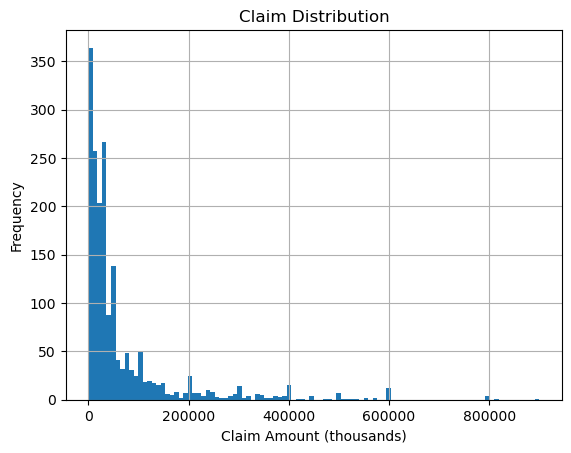

In [398]:
plt.figure(figsize=(20,10))
mergeFinal[['Claim_amount (thousand)']].hist(bins=100)
plt.title('Claim Distribution')
plt.xlabel('Claim Amount (thousands)')
plt.ylabel('Frequency')

plt.show()

#Histogram showing the frequency of claim amounts. 
#This shows that the data for claim amounts is skewed right, which is expected from a dataset with a high count of younger firms.
#The exponential distribution of claims allows for a logarithmic transformation if necessary.
#Easy to see that there are outliers or extreme values.

<Figure size 2000x1000 with 0 Axes>

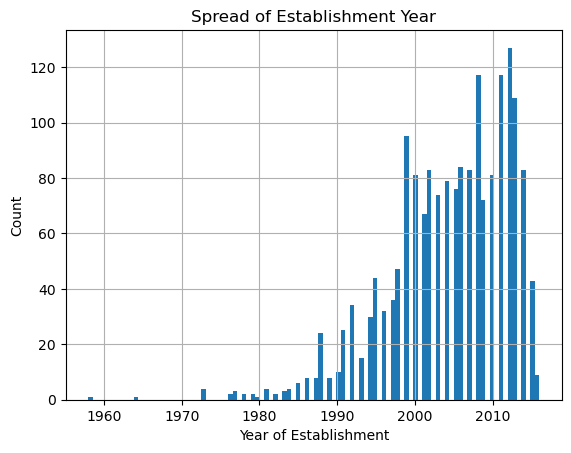

In [400]:
plt.figure(figsize=(20,10))
mergeFinal[['Year_of_establishment']].hist(bins=100)
plt.title('Spread of Establishment Year')
plt.xlabel('Year of Establishment')
plt.ylabel('Count')

plt.show()

#Histogram shows the distribution of the year of establishment
#This is expected when compared to the claims distribution. 
#With a higher concentration of newer companies, it is expected to have a higher frequency of smaller claims as claims take time to increase.


<Figure size 2000x1000 with 0 Axes>

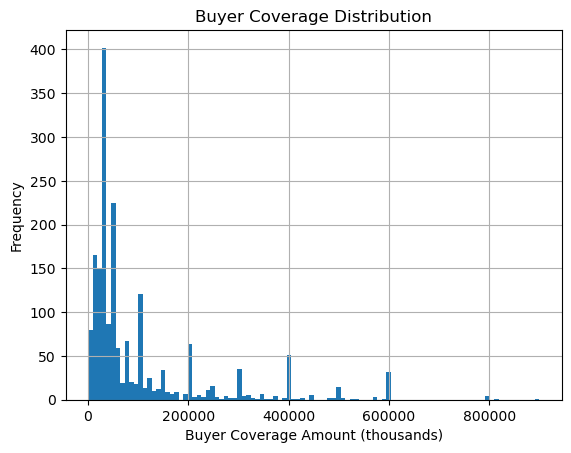

In [402]:
plt.figure(figsize=(20,10))
mergeFinal[['Amount of coverage_buyer (thousand)']].hist(bins=100)
plt.title('Buyer Coverage Distribution')
plt.xlabel('Buyer Coverage Amount (thousands)')
plt.ylabel('Frequency')
plt.show()

#Histogram shows the distribution of buyer coverage.
#This distribution makes sense compared to the claims distribution as we expect buyers to purchase more coverage (largest possible loss) than expected claims (most likely loss size).


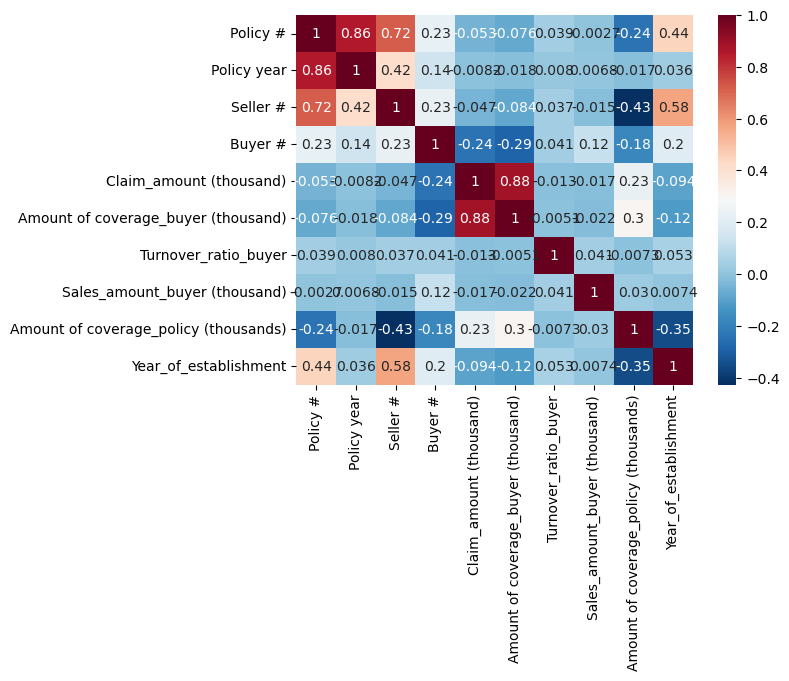

In [404]:
sns.heatmap(mergeFinal.corr(numeric_only=True), annot=True, cmap="RdBu_r")
plt.show()

# Policy year and policy number likely have a high positive correlation as policies purchased in the same year are more likely to have closer policy numbers than those in different years.
# A higher positive correlation between claim amount and coverage amount is expected as buyers are expected to purchase coverage sufficient for covering their claims and losses.
# A negative correlation between the amount of policy coverage and the year of establishment can be explained by buyer size (affected by year of establishment) having less of an impact than the industry operated in on coverage amount.



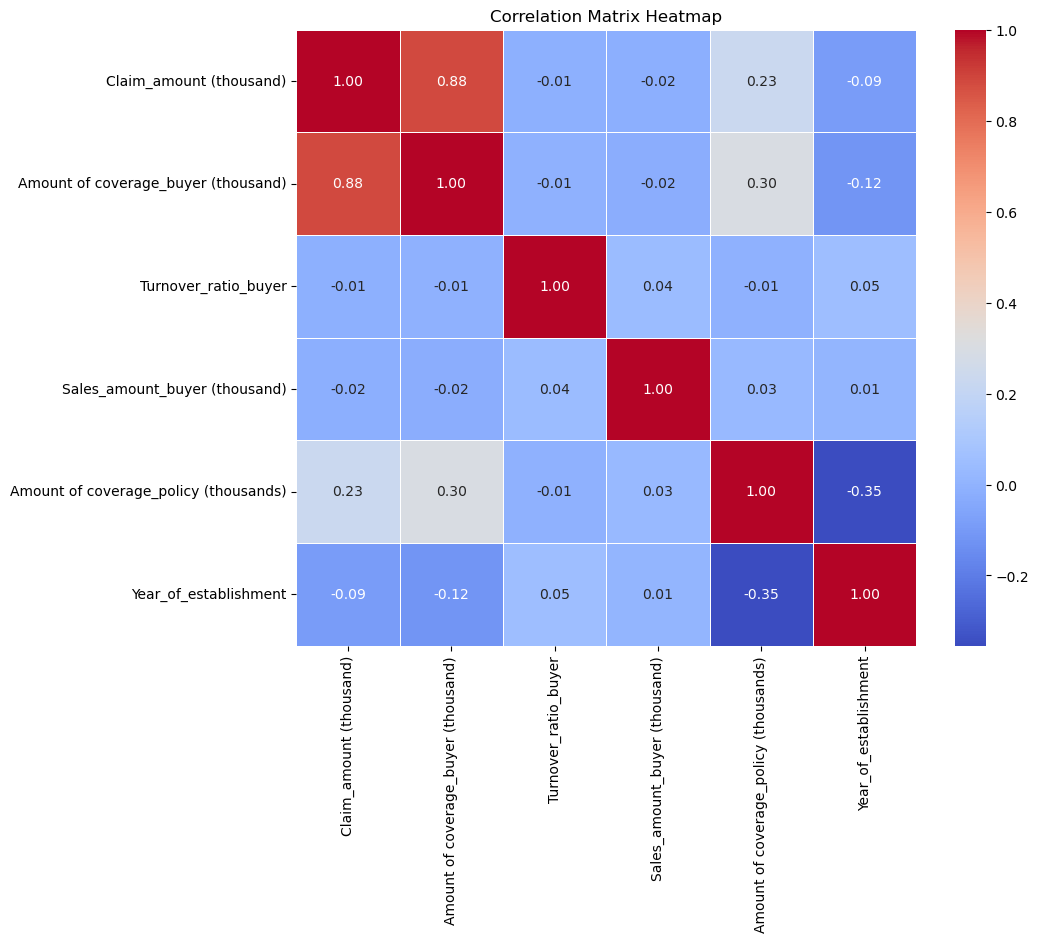

In [406]:
df_mF = pd.DataFrame(mergeFinal)

exclude_columns = ["Policy #", "Policy year", "Seller #", "Buyer #"]

filtered_df_mF = df_mF.drop(columns=exclude_columns)
filtered_df_mF = filtered_df_mF.select_dtypes(include='number')
correlation_matrix = filtered_df_mF.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

#Correlation matrix with non-identifying, numeric data only.

<Figure size 1000x500 with 0 Axes>

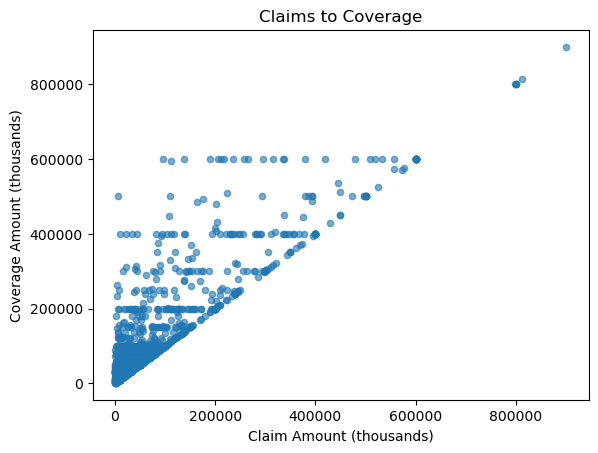

In [408]:
plt.figure(figsize=(10,5))
mergeFinal.plot.scatter(x = 'Claim_amount (thousand)', y = "Amount of coverage_buyer (thousand)", alpha=0.6)
plt.title('Claims to Coverage')
plt.xlabel('Claim Amount (thousands)')
plt.ylabel('Coverage Amount (thousands)')
plt.show()

#The scatter plot between Claims and Coverage is expected as it is expected that buyers have more coverage than the claim amount, or in the event that the loss is greater than the coverage, claims are only paid up to the coverage amount (unless ordered to by a judge).

## 4) Regression Analysis

$$
ClaimAmount = \beta_0 + \beta_1AmountofCoverage(Thousand) + \beta_2TurnoverRatioBuyer \\
+ \beta_3SalesAmountBuyer(thousand) + \beta_4AmountofCoveragePolicy(thousands) + \beta_5APolicyTypeOneBuyer \\
+ \beta_6APolciyYear2016 + \beta_7BuissnessTypeBuyerIndividualBuissness + \beta_8IndustryBuyerManufacturing \\
+ \beta_9IndustryBuyerOtherServices + \beta_{10}IndustryBuyerProfessionlScientificandT + \beta_{11}IndustryBuyerTransportation \\
+ \beta_{12}IndustryBuyerUtilities + \beta_{13}IndustryBuyerWholesaleTrade + \beta_{14}BuissnessTypeSellerIndividualBuissness \\
+ \beta_{15}IndustrySellerManufacturing + \beta_{16}IndustrySellerOtherServices + \beta_{17}IndustrySellerProfessionalScientificandT \\
+ \beta_{18}IndustrySellerTransportation + \beta_{19}IndustrySellerWholesaleTrade + \epsilon
$$

Model and Analysis Report
Data Preparation
1. Feature and Target Selection:
- Features (X) were selected by removing irrelevant columns (e.g., unique identifiers such as 'Policy #' and 'Buyer #').
- Target variable (y) was defined as 'Claim Amount.'
- Equation regressed is below:

2. Handling Categorical Variables:
- Categorical variables were identified and transformed into numeric representations using one-hot encoding.
- All features were confirmed to be numeric after preprocessing.
3. Data Splitting:
- The dataset was split into training (80%) and validation (20%) subsets for unbiased model evaluation.
Linear Regression
1. Model Training:
- A linear regression model was trained on the dataset to establish a baseline performance.
2. Feature Coefficients:
- The model coefficients were calculated to assess the influence of individual predictors. However, most predictors had non-significant p-values (p > 0.05), indicating limited statistical importance.
Conclusion:
- Linear regression provided a baseline for comparison, but its performance was better, with high R² values and limited predictor significance.
Logarithmic Regression
1. Model Training:
- The dataset was transformed using a logarithmic scale on the target variable before training the regression model.
2. Insights:
- The logarithmic transformation did not improve the model's performance compared to linear regression.
- Conclusion: Logarithmic regression did not perform better than linear regression due to the fact that the data was initally in a form that is non-linear.  When you use log on that data, it can worsen the result, which is the exact result we recieved. Using other regression methods would be advised as a result.


Random Forest Regression
1. Baseline Model:
- A baseline random forest regressor was trained with 15 estimators, resulting in:
  - RMSE: 60085.93
  - R²: 0.7398 (Validation Set)
2. Hyperparameter Tuning:
- Using grid search with cross-validation, the model was optimized with the following parameters:
  - Number of Trees (n_estimators): 200
  - Maximum Depth: 10
  - Minimum Samples Split: 10
  - Minimum Samples Leaf: 1
3. Tuned Model Performance:
- Training Results:
  - RMSE: 31218.10
  - R²: 0.9163
- Validation Results:
  - RMSE: 58199.44
  - R²: 0.7559
Conclusion:
- Random Forest regression significantly outperformed logarithmic regression, demonstrating superior model fit and predictive capability. However, the linear model performed well with a relatively low RMSE and high R2
  
Key Insights
1. Feature Impact:
- Linear and logarithmic regression provided interpretable coefficients, but most predictors lacked statistical significance.
- Random forest, with its ensemble-based nature, implicitly captured complex feature interactions.
2. Performance:
- Random Forest regression demonstrated its ability to handle non-linear relationships and high-dimensional data, making it a good model for most dataset.
3. Model Selection:
- The importance of hyperparameter tuning was evident, as the optimized random forest model significantly improved performance.
  
Recommendations
- Employ the tuned random forest model for future predictions due to its superior accuracy and robustness.
- Investigate the importance of individual features using random forest's feature importance metrics.
- Conduct residual analysis to identify patterns that the model might not have captured.


In [413]:
mergeFinal.head()

,Policy #,Policy_type,Policy year,Seller #,Buyer #,Claim_amount (thousand),Amount of coverage_buyer (thousand),Turnover_ratio_buyer,Business_type_buyer,Industry_buyer,Sales_amount_buyer (thousand),Amount of coverage_policy (thousands),Business_type_Seller,Industry_Seller,Year_of_establishment
0,21,Multiple buyers,2015,101800,2265700,29854.590,30000.0,2.02,Individual Business,Wholesale Trade,6234000.0,347000.0,Individual Business,Manufacturing,1983
3,64,Multiple buyers,2015,105700,2285600,15000.000,15000.0,5.30,Individual Business,Wholesale Trade,4797000.0,569000.0,Corporation,Transportation,1981
5,73,One_buyer,2015,106300,2288500,763.361,4000.0,8.16,Corporation,Manufacturing,49375000.0,4000.0,Individual Business,Manufacturing,1994
6,78,Multiple buyers,2015,106800,2289900,221610.224,400000.0,4.05,Corporation,Manufacturing,5759000.0,656000.0,Individual Business,Manufacturing,1981
8,99,Multiple buyers,2015,108000,920600,2838.563,5000.0,4.56,Corporation,Manufacturing,8016000.0,266000.0,Corporation,Manufacturing,1986


In [415]:
mergeFinal.describe()

,Policy #,Policy year,Seller #,Buyer #,Claim_amount (thousand),Amount of coverage_buyer (thousand),Turnover_ratio_buyer,Sales_amount_buyer (thousand),Amount of coverage_policy (thousands),Year_of_establishment
count,1836.000000,1836.000000,1.836000e+03,1.836000e+03,1836.000000,1836.000000,1836.000000,1.836000e+03,1.836000e+03,1836.000000
mean,13319.232571,2015.508170,8.892450e+05,2.907175e+06,68400.033459,99840.958606,6.609448,5.178473e+07,7.010033e+05,2004.337691
std,8126.258635,0.500069,5.928217e+05,1.478921e+06,110002.121252,132605.204874,3.975764,1.122003e+08,7.676348e+05,7.748943
min,21.000000,2015.000000,1.013000e+05,1.082000e+05,253.440000,1000.000000,2.000000,0.000000e+00,3.000000e+03,1958.000000
25%,5923.250000,2015.000000,3.917000e+05,2.309500e+06,11061.440000,30000.000000,4.080000,5.394500e+06,6.975000e+04,2000.000000
50%,13507.500000,2016.000000,7.634000e+05,2.862400e+06,30000.000000,50000.000000,6.120000,1.442050e+07,4.500000e+05,2006.000000
75%,19795.000000,2016.000000,1.241725e+06,4.023900e+06,69096.517000,100000.000000,8.240000,4.051900e+07,1.000000e+06,2011.000000
max,28612.000000,2016.000000,2.251800e+06,5.847300e+06,900000.000000,900000.000000,93.330000,9.380640e+08,3.530000e+06,2016.000000


In [417]:
#changes the data type of the specified column to categorical
mergeFinal['Policy year'] = mergeFinal['Policy year'].astype('category')


In [419]:
# Step 1: Define Features (X) and Target Variable (Y)
X = mergeFinal.drop(columns=["Claim_amount (thousand)","Policy #","Buyer #", 'Seller #','Year_of_establishment'])  
y = mergeFinal["Claim_amount (thousand)"]

#split numeric and categorical variables
X_num = X.drop(columns=['Business_type_Seller', 'Industry_Seller', 'Policy_type','Business_type_buyer', 'Industry_buyer'])
#scaling
from sklearn.preprocessing import StandardScaler
num_scaler = StandardScaler() # transformer
X_num = num_scaler.fit_transform(X_num)

# Step 1: Identify columns with 'CategoricalDtype'
categorical_columns = X.select_dtypes(include=["category", "object"]).columns
print("Categorical Columns:", categorical_columns)

# Step 2: Convert 'CategoricalDtype' to string (if necessary)
X[categorical_columns] = X[categorical_columns].astype(str)

# Step 3: Apply one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)


# Step 4: Verify all columns are numeric
are_all_numeric = X_encoded.dtypes.apply(lambda dtype: np.issubdtype(dtype, np.number)).all()
print("Are all columns numeric?", are_all_numeric)



Categorical Columns: Index(['Policy_type', 'Policy year', 'Business_type_buyer', 'Industry_buyer',
       'Business_type_Seller', 'Industry_Seller'],
      dtype='object')
Are all columns numeric? False


In [421]:

# Step 5: Retry splitting the data
X_train, X_valid, y_train, y_valid = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
# Step 3: Check the Shape of the Splits (Optional)
print("Training set shape (X):", X_train.shape)
print("Validation set shape (X):", X_valid.shape)
print("Training set shape (Y):", y_train.shape)
print("Validation set shape (Y):", y_valid.shape)

Training set shape (X): (1468, 19)
Validation set shape (X): (368, 19)
Training set shape (Y): (1468,)
Validation set shape (Y): (368,)


In [423]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

 #Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [425]:

from scipy.stats import t
import numpy as np

# Get coefficients and residuals
coefficients = model.coef_
intercept = model.intercept_
y_pred_train = model.predict(X_train)
residuals = y_train - y_pred_train

# Ensure X_train is a NumPy array with numeric types
X_train1 = np.asarray(X_train, dtype=np.float64)  # Force conversion to float64
n, k = X_train.shape

# Add intercept
X_train_with_intercept = np.column_stack([np.ones(n), X_train1])  # Add intercept

sigma_squared = np.sum(residuals**2) / (n-k-1)

# Calculate covariance matrix
cov_matrix = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) * sigma_squared
standard_errors = np.sqrt(np.diag(cov_matrix))

# Proceed as before
t_stats = coefficients / standard_errors[1:]  # Exclude intercept
p_values = [2 * (1 - t.cdf(np.abs(t_val), df=n - k - 1)) for t_val in t_stats]
# Define significance level (e.g., 0.05)

significance_level = 0.05

# Create a DataFrame for the results
results_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": coefficients,
    "Standard Error": standard_errors[1:],  # Exclude intercept
    "t-Statistic": t_stats,
    "p-Value": p_values,
    "Significant": ["Yes" if p < significance_level else "No" for p in p_values]
})

# Display the DataFrame
print("Intercept:", intercept)
print(results_df)

Intercept: 114628.38368314639
                                              Feature    Coefficient  \
0                 Amount of coverage_buyer (thousand)       0.745854   
1                                Turnover_ratio_buyer    -200.658707   
2                       Sales_amount_buyer (thousand)       0.000006   
3               Amount of coverage_policy (thousands)      -0.004598   
4                               Policy_type_One_buyer    5134.390948   
5                                    Policy year_2016     -46.230066   
6             Business_type_buyer_Individual Business    -883.306333   
7                        Industry_buyer_Manufacturing   -8248.424364   
8                       Industry_buyer_Other Services    -659.987906   
9   Industry_buyer_Professional, Scientific, and T...   -9892.805309   
10                      Industry_buyer_Transportation  -29846.982484   
11                           Industry_buyer_Utilities   -7760.899170   
12                     Industry_bu

In [427]:
# Step 8: Make predictions
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

# Step 9: Evaluate the model
# Training metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
valid_r2 = r2_score(y_valid, y_valid_pred)
lin_rmse1 = np.sqrt(train_mse)

# Validation metrics
valid_mae = mean_absolute_error(y_valid, y_valid_pred)
valid_mse = mean_squared_error(y_valid, y_valid_pred)
valid_r2 = r2_score(y_valid, y_valid_pred)
lin_rmse = np.sqrt(valid_mse)

# Print results
print("Training Performance:")
print(f"MAE: {train_mae:.2f}, RMSE: {lin_rmse1:.2f}, R2: {train_r2:.4f}")

print("\nValidation Performance:")
print(f"MAE: {valid_mae:.2f}, RMSE: {lin_rmse:.2f}, R2: {valid_r2:.4f}")

Training Performance:
MAE: 28769.45, RMSE: 49706.89, R2: 0.7877

Validation Performance:
MAE: 31377.23, RMSE: 54681.38, R2: 0.7845


In [429]:
y_valid_pred[:5]

array([125956.12831203,  26282.88460174,  14601.032301  ,  29007.06802883,
       244022.53043256])

In [431]:
y_valid[:5].values

array([ 44516.56 ,  44000.   ,  30000.   ,  29361.36 , 154121.726])

In [433]:
# evaluate the RMSE
lin_mse = mean_squared_error(y_valid, y_valid_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

54681.37892692017

In [435]:
#Data Visualization

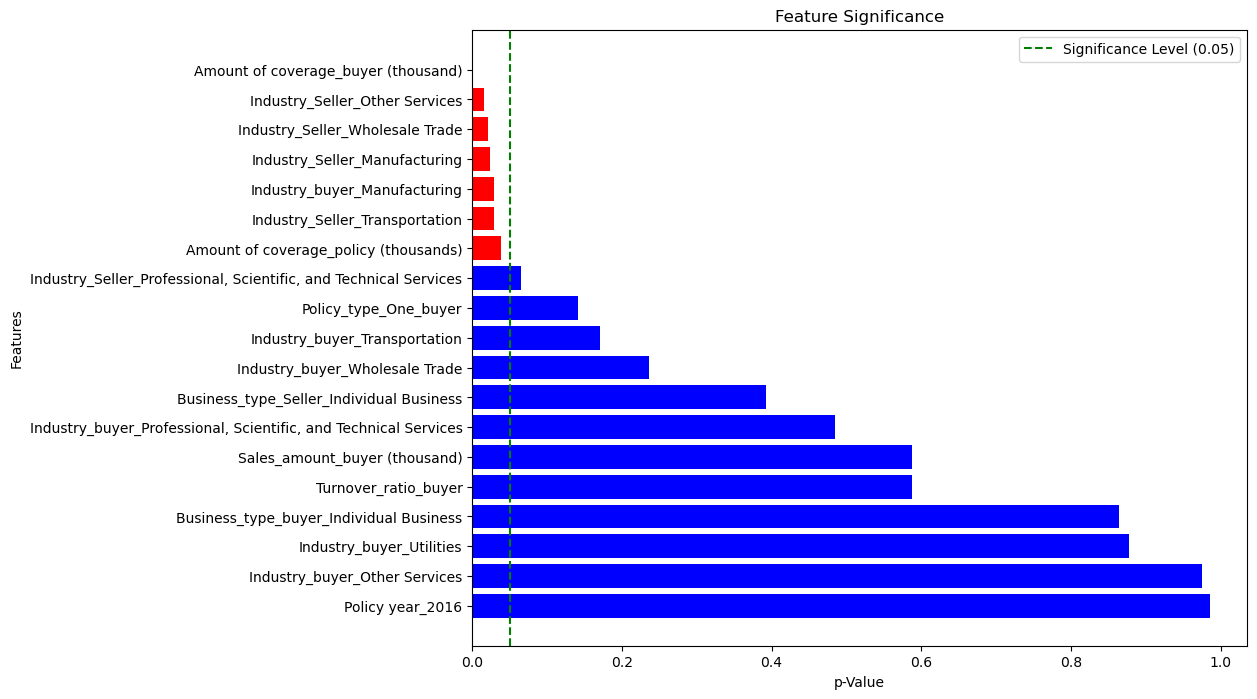

In [437]:
results_df_sorted = results_df.sort_values(by="p-Value", ascending=True)

plt.figure(figsize=(10, 8))
colors = ["red" if significant == "Yes" else "blue" for significant in results_df_sorted["Significant"]]
plt.barh(results_df_sorted["Feature"], results_df_sorted["p-Value"], color=colors)
plt.axvline(x=significance_level, color="green", linestyle="--", label=f"Significance Level ({significance_level})")

plt.xlabel("p-Value")
plt.ylabel("Features")
plt.title("Feature Significance")
plt.legend()
plt.gca().invert_yaxis()
plt.show()

#A bar chart showing the most significant variables by p-value with an alpha of 0.05.

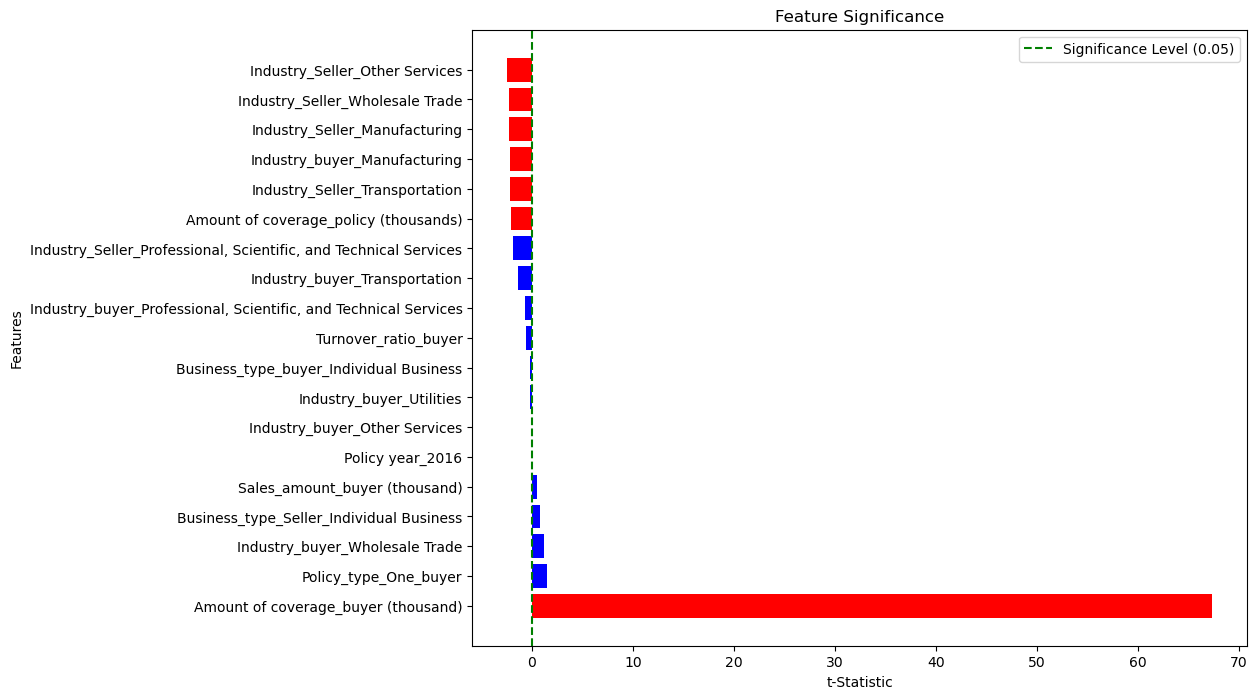

In [439]:
results_df_sorted = results_df.sort_values(by="t-Statistic", ascending=True)

plt.figure(figsize=(10, 8))
colors = ["red" if significant == "Yes" else "blue" for significant in results_df_sorted["Significant"]]
plt.barh(results_df_sorted["Feature"], results_df_sorted["t-Statistic"], color=colors)
plt.axvline(x=significance_level, color="green", linestyle="--", label=f"Significance Level ({significance_level})")

plt.xlabel("t-Statistic")
plt.ylabel("Features")
plt.title("Feature Significance")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


In [441]:
print(len(mergeFinal['Claim_amount (thousand)']))
print(len(y_valid_pred))

1836
368


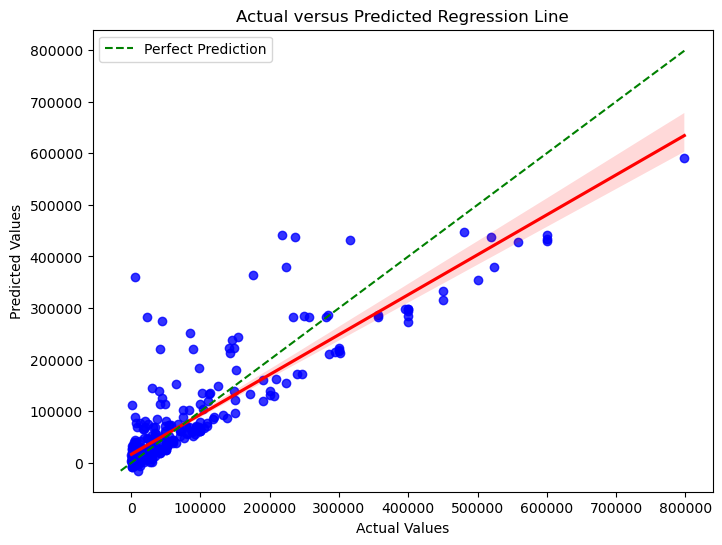

In [443]:
#Actual vs Predicted Claims
data_AvP = pd.DataFrame({
    "Actual": y_valid,  # Use Series
    "Predicted": y_valid_pred
})

plt.figure(figsize=(8, 6))
sns.regplot(x="Actual", y="Predicted", data=data_AvP, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual versus Predicted Regression Line")

actual_values = data_AvP["Actual"]
predicted_values = data_AvP["Predicted"]
max_val = max(max(actual_values), max(predicted_values))
min_val = min(min(actual_values), min(predicted_values))
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', label="Perfect Prediction")

plt.legend()
plt.show()


## Adjust the Model

### a) Feature Engineering
- logarithmic transformations for skewed features.  

---

### b) Handle Target Variable Skew
- If the `Claim_amount` is highly skewed, applying transformations `log` help stabilize variance and improve model performance.

---

In [446]:
mergeFinal1=mergeFinal.copy()

In [448]:
# Select numerical columns
numerical_columns = mergeFinal1.select_dtypes(include=['int64', 'float64']).columns

# Calculate skewness for each numerical column
skewness = mergeFinal1[numerical_columns].skew()

# Filter columns with high skewness (absolute skewness > 1)
high_skew_columns = skewness[abs(skewness) > 1]

# Display skewed columns and their skewness values
print("Highly Skewed Numerical Columns:")
print(high_skew_columns)

Highly Skewed Numerical Columns:
Claim_amount (thousand)                  3.266007
Amount of coverage_buyer (thousand)      2.435453
Turnover_ratio_buyer                     7.502876
Sales_amount_buyer (thousand)            3.518739
Amount of coverage_policy (thousands)    1.308906
dtype: float64


In [450]:
skewed_columns = ['Claim_amount (thousand)', 'Amount of coverage_policy (thousands)','Amount of coverage_buyer (thousand)','Turnover_ratio_buyer','Sales_amount_buyer (thousand)' ]  # Replace with identified skewed columns
for col in skewed_columns:
    mergeFinal1[col] = np.log1p(mergeFinal1[col])  # Adds 1 to avoid log(0)

In [452]:
# Step 1: Define Features (X) and Target Variable (Y)
X = mergeFinal.drop(columns=["Claim_amount (thousand)","Policy #","Buyer #", 'Seller #','Year_of_establishment'])  
y = mergeFinal1["Claim_amount (thousand)"]

#split numeric and categorical variables
X_num = X.drop(columns=['Business_type_Seller', 'Industry_Seller', 'Policy_type','Business_type_buyer', 'Industry_buyer'])
#scaling
from sklearn.preprocessing import StandardScaler
num_scaler = StandardScaler() # transformer
X_num = num_scaler.fit_transform(X_num)

# Step 1: Identify columns with 'CategoricalDtype'
categorical_columns = X.select_dtypes(include=["category", "object"]).columns
print("Categorical Columns:", categorical_columns)

# Step 2: Convert 'CategoricalDtype' to string (if necessary)
X[categorical_columns] = X[categorical_columns].astype(str)

# Step 3: Apply one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)


# Step 4: Verify all columns are numeric
are_all_numeric = X_encoded.dtypes.apply(lambda dtype: np.issubdtype(dtype, np.number)).all()
print("Are all columns numeric?", are_all_numeric)



Categorical Columns: Index(['Policy_type', 'Policy year', 'Business_type_buyer', 'Industry_buyer',
       'Business_type_Seller', 'Industry_Seller'],
      dtype='object')
Are all columns numeric? False


In [454]:

# Step 5: Retry splitting the data
X_train, X_valid, y_train, y_valid = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
# Step 3: Check the Shape of the Splits (Optional)
print("Training set shape (X):", X_train.shape)
print("Validation set shape (X):", X_valid.shape)
print("Training set shape (Y):", y_train.shape)
print("Validation set shape (Y):", y_valid.shape)

Training set shape (X): (1468, 19)
Validation set shape (X): (368, 19)
Training set shape (Y): (1468,)
Validation set shape (Y): (368,)


In [456]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

 #Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [458]:

from scipy.stats import t
import numpy as np

# Get coefficients and residuals
coefficients = model.coef_
intercept = model.intercept_
y_pred_train = model.predict(X_train)
residuals = y_train - y_pred_train
# Ensure X_train is a NumPy array with numeric types
X_train1 = np.asarray(X_train, dtype=np.float64)  # Force conversion to float64

# Add intercept
X_train_with_intercept = np.column_stack([np.ones(X_train1.shape[0]), X_train1])  # Add intercept

# Calculate covariance matrix
cov_matrix = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) * sigma_squared
standard_errors = np.sqrt(np.diag(cov_matrix))

# Proceed as before
t_stats = coefficients / standard_errors[1:]  # Exclude intercept
p_values = [2 * (1 - t.cdf(np.abs(t_val), df=n - k - 1)) for t_val in t_stats]

# Define significance level (e.g., 0.05)
significance_level = 0.05

# Create a DataFrame for the results
results_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": coefficients,
    "Standard Error": standard_errors[1:],  # Exclude intercept
    "t-Statistic": t_stats,
    "p-Value": p_values,
    "Significant": ["Yes" if p < significance_level else "No" for p in p_values]
})

# Display the DataFrame
print("Intercept:", intercept)
print(results_df)

Intercept: 10.009881155607259
                                              Feature   Coefficient  \
0                 Amount of coverage_buyer (thousand)  6.949350e-06   
1                                Turnover_ratio_buyer -1.243652e-02   
2                       Sales_amount_buyer (thousand) -9.861654e-10   
3               Amount of coverage_policy (thousands)  6.337514e-08   
4                               Policy_type_One_buyer -1.091092e-01   
5                                    Policy year_2016 -8.412203e-02   
6             Business_type_buyer_Individual Business -2.342431e-01   
7                        Industry_buyer_Manufacturing  2.369503e-01   
8                       Industry_buyer_Other Services  3.596516e-01   
9   Industry_buyer_Professional, Scientific, and T... -3.170261e-01   
10                      Industry_buyer_Transportation  2.555599e-01   
11                           Industry_buyer_Utilities -1.156096e-01   
12                     Industry_buyer_Wholesale

In [460]:
# Step 8: Make predictions
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)


# Step 9: Evaluate the model
# Training metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
valid_r2 = r2_score(y_valid, y_valid_pred)
lin_rmse1 = np.sqrt(train_mse)

# Validation metrics
valid_mae = mean_absolute_error(y_valid, y_valid_pred)
valid_mse = mean_squared_error(y_valid, y_valid_pred)
valid_r2 = r2_score(y_valid, y_valid_pred)
lin_rmse = np.sqrt(valid_mse)

# Print results
print("Training Performance:")
print(f"MAE: {train_mae:.2f}, RMSE: {lin_rmse1:.2f}, R2: {train_r2:.4f}")

print("\nValidation Performance:")
print(f"MAE: {valid_mae:.2f}, RMSE: {lin_rmse:.2f}, R2: {valid_r2:.4f}")

Training Performance:
MAE: 0.80, RMSE: 1.02, R2: 0.4771

Validation Performance:
MAE: 0.81, RMSE: 1.06, R2: 0.4814


In [462]:
y_valid_pred[:5]

array([11.02603706, 10.13079463,  9.71410997,  9.56162159, 11.82293483])

In [464]:
y_valid[:5].values

array([10.703639  , 10.69196764, 10.30898599, 10.28746886, 11.94550449])

In [466]:
#Data Visualization

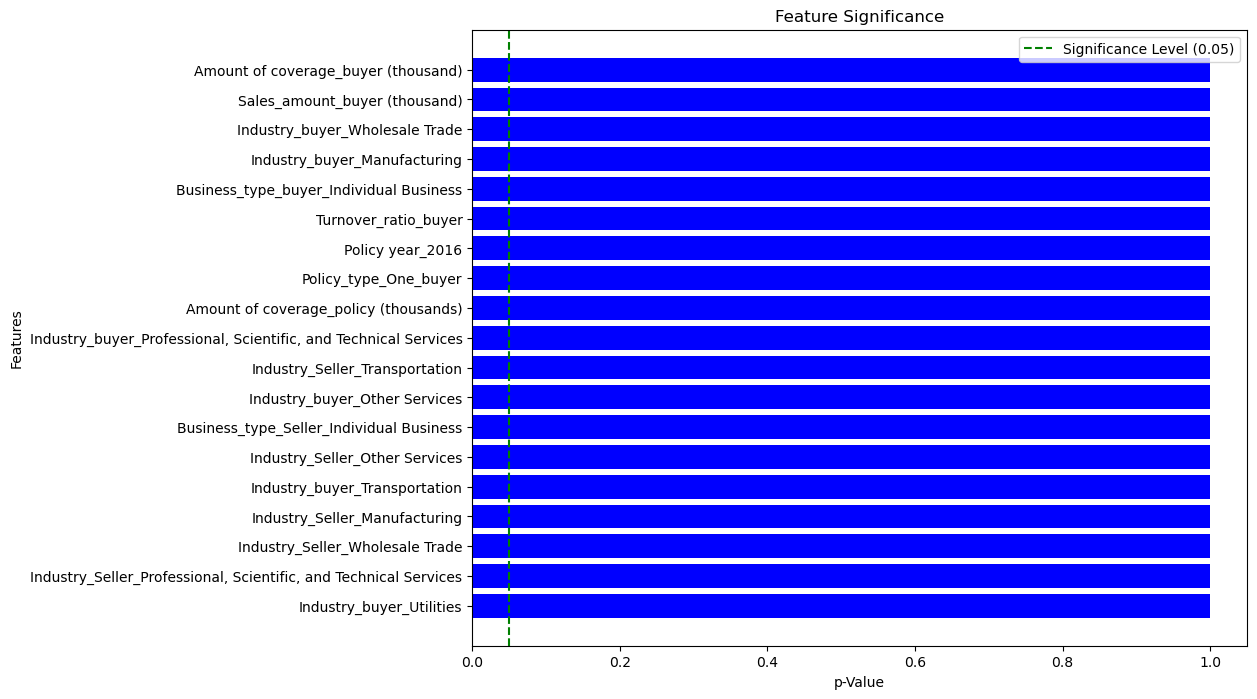

In [468]:
results_df_sorted2 = results_df.sort_values(by="p-Value", ascending=True)

plt.figure(figsize=(10, 8))
colors = ["red" if significant == "Yes" else "blue" for significant in results_df_sorted2["Significant"]]
plt.barh(results_df_sorted2["Feature"], results_df_sorted2["p-Value"], color=colors)
plt.axvline(x=significance_level, color="green", linestyle="--", label=f"Significance Level ({significance_level})")

plt.xlabel("p-Value")
plt.ylabel("Features")
plt.title("Feature Significance")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


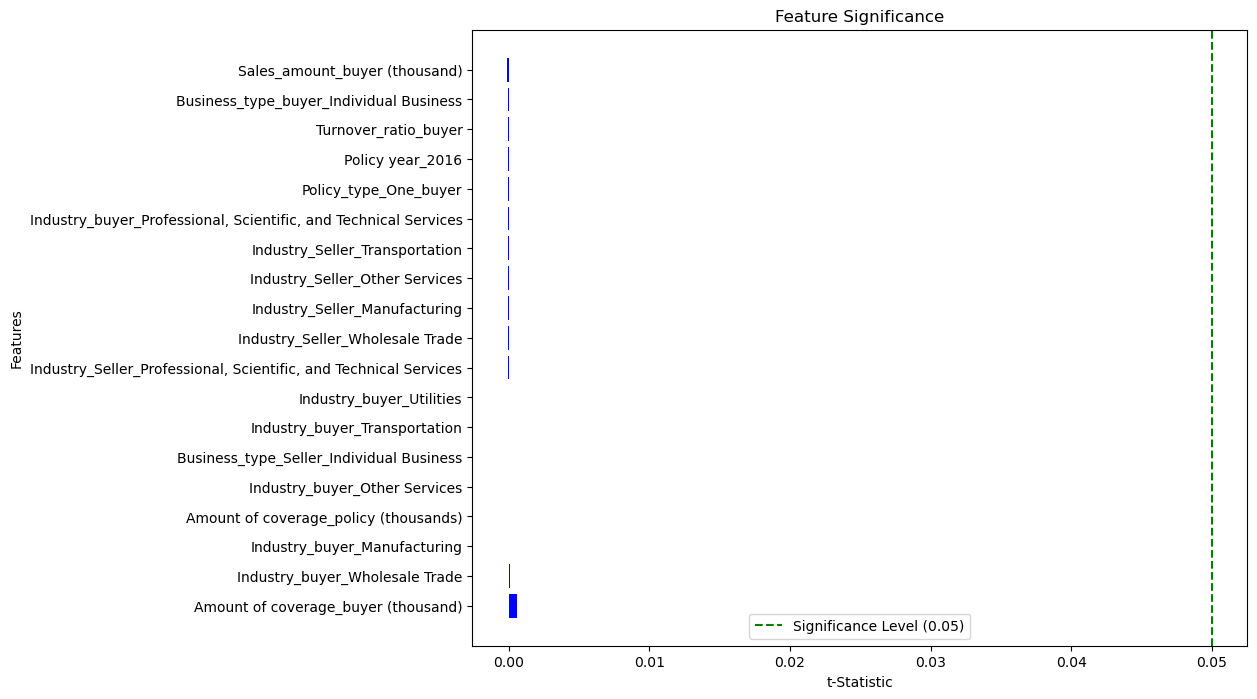

In [470]:
results_df_sorted2 = results_df.sort_values(by="t-Statistic", ascending=True)

plt.figure(figsize=(10, 8))
colors = ["red" if significant == "Yes" else "blue" for significant in results_df_sorted2["Significant"]]
plt.barh(results_df_sorted2["Feature"], results_df_sorted2["t-Statistic"], color=colors)
plt.axvline(x=significance_level, color="green", linestyle="--", label=f"Significance Level ({significance_level})")

plt.xlabel("t-Statistic")
plt.ylabel("Features")
plt.title("Feature Significance")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


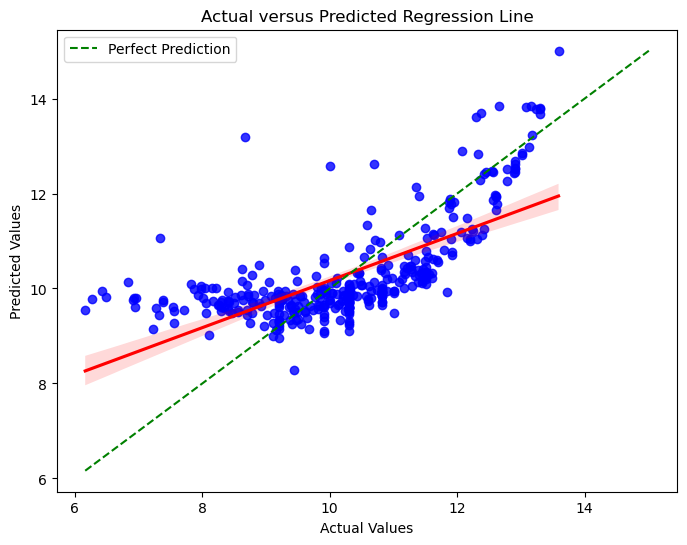

In [472]:
#Actual vs Predicted
data_AvP = pd.DataFrame({
    "Actual": y_valid,  # Use Series
    "Predicted": y_valid_pred
})

plt.figure(figsize=(8, 6))
sns.regplot(x="Actual", y="Predicted", data=data_AvP, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual versus Predicted Regression Line")

actual_values = data_AvP["Actual"]
predicted_values = data_AvP["Predicted"]
max_val = max(max(actual_values), max(predicted_values))
min_val = min(min(actual_values), min(predicted_values))
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', label="Perfect Prediction")

plt.legend()
plt.show()


### Decision tree regression model (Random Forest)

In [475]:
mergeFinal2=mergeFinal.copy()

In [477]:
# Step 1: Define Features (X) and Target Variable (Y)
X = mergeFinal.drop(columns=["Claim_amount (thousand)","Policy #","Buyer #", 'Seller #','Year_of_establishment'])  
y = mergeFinal2["Claim_amount (thousand)"]

#split numeric and categorical variables
X_num = X.drop(columns=['Business_type_Seller', 'Industry_Seller', 'Policy_type','Business_type_buyer', 'Industry_buyer'])
#scaling
from sklearn.preprocessing import StandardScaler
num_scaler = StandardScaler() # transformer
X_num = num_scaler.fit_transform(X_num)

# Step 1: Identify columns with 'CategoricalDtype'
categorical_columns = X.select_dtypes(include=["category", "object"]).columns
print("Categorical Columns:", categorical_columns)

# Step 2: Convert 'CategoricalDtype' to string (if necessary)
X[categorical_columns] = X[categorical_columns].astype(str)

# Step 3: Apply one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)


# Step 4: Verify all columns are numeric
are_all_numeric = X_encoded.dtypes.apply(lambda dtype: np.issubdtype(dtype, np.number)).all()
print("Are all columns numeric?", are_all_numeric)


Categorical Columns: Index(['Policy_type', 'Policy year', 'Business_type_buyer', 'Industry_buyer',
       'Business_type_Seller', 'Industry_Seller'],
      dtype='object')
Are all columns numeric? False


In [479]:

# Step 5: Retry splitting the data
X_train, X_valid, y_train, y_valid = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
# Step 3: Check the Shape of the Splits (Optional)
print("Training set shape (X):", X_train.shape)
print("Validation set shape (X):", X_valid.shape)
print("Training set shape (Y):", y_train.shape)
print("Validation set shape (Y):", y_valid.shape)

Training set shape (X): (1468, 19)
Validation set shape (X): (368, 19)
Training set shape (Y): (1468,)
Validation set shape (Y): (368,)


In [481]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=15, random_state=42) # n_estimators: # of trees, max_features: # of features considered for each split
forest_reg.fit(X_train, y_train)

y_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_predictions,y_train)
forest_rmse = np.sqrt(forest_mse)
forest_mse

423270514.5268671

In [483]:
y_pred = forest_reg.predict(X_valid)
# R² Score
r2 = r2_score(y_valid, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"R²: {r2}, RMSE: {rmse}")


R²: 0.7398452096374134, RMSE: 60085.925415925485


In [485]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_train=best_model.predict(X_train)
r2_best1 = r2_score(y_train, y_pred_train)
rmse_best1 = np.sqrt(mean_squared_error(y_train, y_pred_train))

y_pred_best = best_model.predict(X_valid)
r2_best = r2_score(y_valid, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_valid, y_pred_best))
print(f"Tuned R²: {r2_best1}, Tuned RMSE: {rmse_best1}")
print(f"Tuned R²: {r2_best}, Tuned RMSE: {rmse_best}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Tuned R²: 0.9162708049680401, Tuned RMSE: 31218.09685458597
Tuned R²: 0.755924623864273, Tuned RMSE: 58199.442485533415


In [487]:
y_valid[:5].values

array([ 44516.56 ,  44000.   ,  30000.   ,  29361.36 , 154121.726])

In [489]:
y_pred_best[:5]

array([115658.86220921,  24525.65732031,  19818.85503504,  24216.60854304,
       282390.36025152])

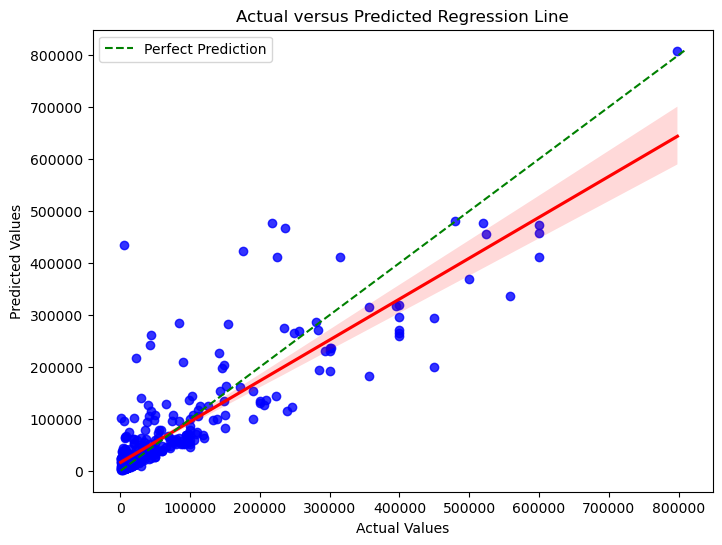

In [491]:
#Actual vs Predicted
data_AvP = pd.DataFrame({
    "Actual": y_valid,  # Use Series
    "Predicted": y_pred_best
})

plt.figure(figsize=(8, 6))
sns.regplot(x="Actual", y="Predicted", data=data_AvP, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual versus Predicted Regression Line")

actual_values = data_AvP["Actual"]
predicted_values = data_AvP["Predicted"]
max_val = max(max(actual_values), max(predicted_values))
min_val = min(min(actual_values), min(predicted_values))
plt.plot([min_val, max_val], [min_val, max_val], color='green', linestyle='--', label="Perfect Prediction")

plt.legend()
plt.show()


## 5) Conclusion

Upon completion of the regression and comparing the models we completed, the best model for predicting the claim severity was the linear model.  The non-linear characteristics of the data ensured using log to address scaling issues only made the issues worse with lower R2 values and greater error.  The random forest method was helpful in creating a model that was stronger compared to the log regression when trained. However, overfitting was occurring as the test samples achieved the highest R2 value and lowest RMSE value, but when verified, it performed worse than the linear model in both measurements. 

To improve the results, more advanced models should be employed to better account for non-linear characteristics while fitting the variables more cohesively. Additional analysis of joint significance could also be employed to better tailor the variables used.  Lastly, residual analysis could be employed to find key areas of concern with the data and better understand how to better fit the approach.